In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2018-1-1')['Adj Close']

In [3]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
2018-01-02,2695.810059,7006.899902,12871.389648
2018-01-03,2713.060059,7065.529785,12978.209961
2018-01-04,2723.989990,7077.910156,13167.889648
2018-01-05,2743.149902,7136.560059,13319.639648
2018-01-08,2747.709961,7157.390137,13367.780273


In [4]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-05-05,2868.439941,8809.120117,10729.459961
2020-05-06,2848.419922,8854.389648,10606.200195
2020-05-07,2881.189941,8979.660156,10759.269531
2020-05-08,2929.800049,9121.320312,10904.480469
2020-05-11,2930.189941,9192.339844,10824.990234


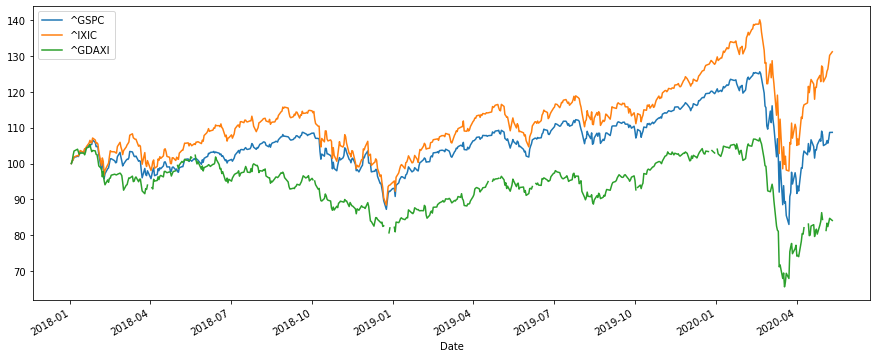

In [5]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

In [6]:
ind_data.loc['Jan 03, 2018']

^GSPC      2713.060059
^IXIC      7065.529785
^GDAXI    12978.209961
Name: 2018-01-03 00:00:00, dtype: float64

In [7]:
# To properly apply iloc, it is important to point to a particular position in the index
ind_data.iloc[1]

^GSPC      2713.060059
^IXIC      7065.529785
^GDAXI    12978.209961
Name: 2018-01-03 00:00:00, dtype: float64

In [8]:
# Calculate Indices Simple Returns & print last week's average daily change
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-05-05,0.009041,0.011298,0.025095
2020-05-06,-0.006979,0.005139,-0.011488
2020-05-07,0.011505,0.014148,0.014432
2020-05-08,0.016872,0.015776,0.013496
2020-05-11,0.000133,0.007786,-0.007290


In [9]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.064826
^IXIC     0.148883
^GDAXI   -0.049486
dtype: float64

In [10]:
tickers = ["PG", 'AA', 'T', 'CHK', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2018-1-1')['Adj Close']

In [11]:
data_2.tail()

,PG,AA,T,CHK,^GSPC,^DJI
Date,,,,,,
2020-05-05,116.010002,7.81,29.740000,15.47,2868.439941,23883.089844
2020-05-06,113.099998,7.71,28.790001,14.85,2848.419922,23664.640625
2020-05-07,112.169998,7.49,28.889999,14.60,2881.189941,23875.890625
2020-05-08,115.949997,8.07,29.790001,14.70,2929.800049,24331.320312
2020-05-11,115.309998,7.77,29.379999,12.90,2930.189941,24221.990234


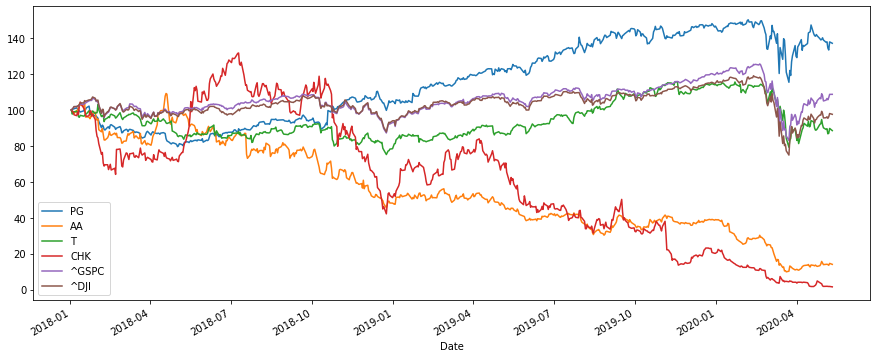

In [12]:
# Normalize data to compare publicly traded companies with market indices
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15,6));
plt.show()